In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
df=pd.read_csv('shopping_behavior.csv')
df.drop('CustomerID',axis=1,inplace=True)
df

,Age,Salary,Weekly_Visits,Avg_Bill,LoyaltyScore
0,56,63088,5,407,27
1,69,59811,3,867,8
2,46,75479,6,282,83
3,32,105392,3,728,65
4,60,107369,6,893,57
...,...,...,...,...,...
895,41,51966,3,821,11
896,32,92545,1,672,56
897,47,32987,4,879,51
898,59,57311,3,361,21


In [6]:
x=df
x

,Age,Salary,Weekly_Visits,Avg_Bill,LoyaltyScore
0,56,63088,5,407,27
1,69,59811,3,867,8
2,46,75479,6,282,83
3,32,105392,3,728,65
4,60,107369,6,893,57
...,...,...,...,...,...
895,41,51966,3,821,11
896,32,92545,1,672,56
897,47,32987,4,879,51
898,59,57311,3,361,21


In [7]:
model=KMeans(n_clusters=3,random_state=42)
df['Cluster']=model.fit_predict(x)
model.n_iter_
model.cluster_centers_

array([[4.43775510e+01, 3.51415748e+04, 3.54421769e+00, 5.54051020e+02,
        4.75408163e+01],
       [4.34760383e+01, 1.01680355e+05, 3.63897764e+00, 5.62191693e+02,
        4.95015974e+01],
       [4.41331058e+01, 6.71685563e+04, 3.51877133e+00, 5.68638225e+02,
        5.21535836e+01]])

In [8]:
center_value=model.cluster_centers_
center_value

array([[4.43775510e+01, 3.51415748e+04, 3.54421769e+00, 5.54051020e+02,
        4.75408163e+01],
       [4.34760383e+01, 1.01680355e+05, 3.63897764e+00, 5.62191693e+02,
        4.95015974e+01],
       [4.41331058e+01, 6.71685563e+04, 3.51877133e+00, 5.68638225e+02,
        5.21535836e+01]])

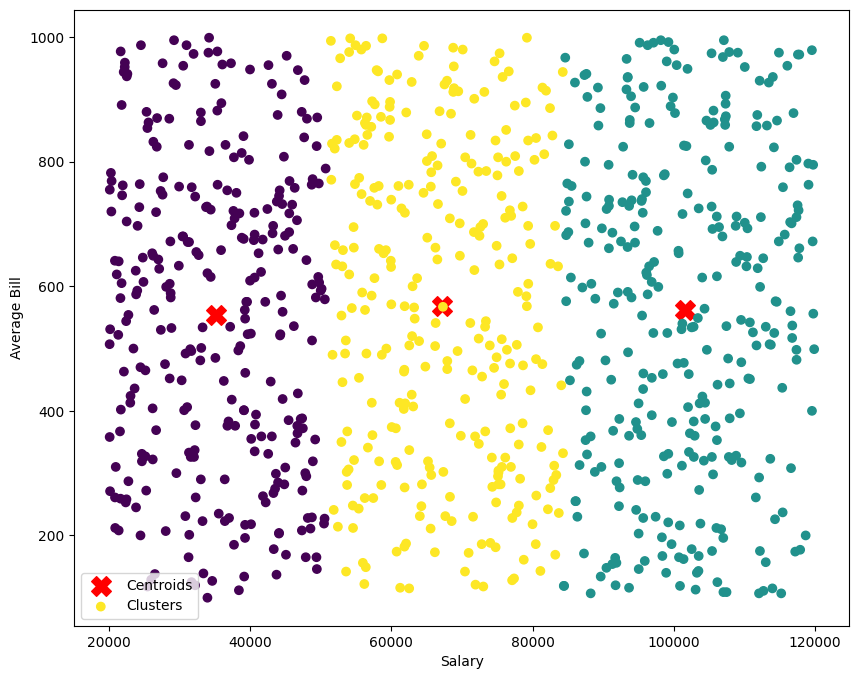

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(center_value[:,1],center_value[:,3],c='red',marker='X',s=200,label='Centroids')
plt.scatter(df['Salary'],df['Avg_Bill'],c=df['Cluster'],cmap='viridis',label='Clusters')
plt.legend()
plt.xlabel('Salary')
plt.ylabel('Average Bill')
plt.show()

In [10]:
cluster_summary=df.groupby("Cluster")[['Salary','Avg_Bill']].mean()
cluster_summary

,Salary,Avg_Bill
Cluster,,
0,35141.574830,554.051020
1,101625.433121,560.780255
2,67109.424658,570.178082


In [11]:
better_cluster=cluster_summary.mean(axis=1).idxmax()
better_cluster

np.int32(1)

In [12]:
new_data=[[30, 60000, 5, 160, 70]]
predicted_cluster = model.predict(new_data)
predicted_cluster

c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

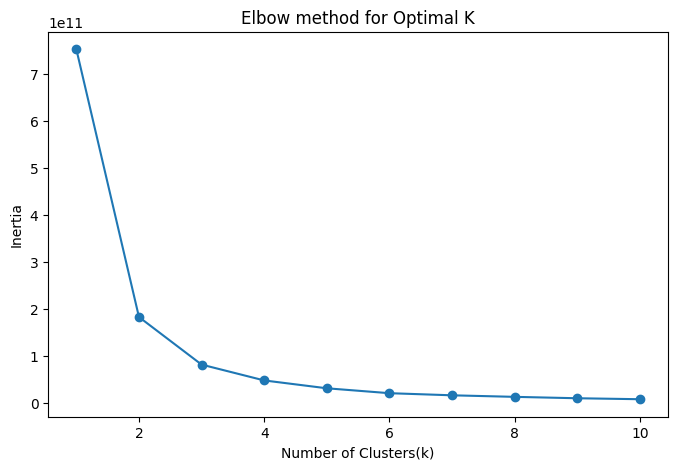

In [13]:
wccs=[]
k_range=range(1,11)
for k in range(1,11):
    Kmeans=KMeans(n_clusters=k,random_state=42)
    Kmeans.fit(x)
    wccs.append(Kmeans.inertia_)
wccs

plt.figure(figsize=(8,5))
plt.plot(k_range,wccs,marker='o')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.title('Elbow method for Optimal K')
plt.show()